In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df=df.iloc[:,2:]

In [4]:
df.sample(5)

,Age,EstimatedSalary,Purchased
212,59,42000,0
63,32,120000,1
290,39,134000,1
114,42,80000,0
266,40,75000,0


Train test split

In [6]:
from sklearn.model_selection import train_test_split
X = df.drop('Purchased', axis=1)
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=24)
X_train.shape, X_test.shape


((280, 2), (120, 2))

 StandardScaler

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
sc = StandardScaler()

In [10]:
# fit the scaler to the train set, it will learn the parameters
sc.fit(X_train)

StandardScaler()

In [11]:
# transform train and test sets
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

In [12]:
sc.mean_

array([3.82714286e+01, 7.02321429e+04])

In [13]:
X_train

,Age,EstimatedSalary
275,57,74000
292,55,39000
153,36,50000
189,28,32000
108,26,86000
...,...,...
129,26,84000
145,24,89000
343,47,51000
192,29,43000


In [14]:
X_train_scaled

array([[ 1.78885657,  0.11103601],
       [ 1.59782688, -0.92038857],
       [-0.21695514, -0.59622656],
       [-0.98107389, -1.12667349],
       [-1.17210358,  0.4646673 ],
       [ 0.26061907, -0.56675729],
       [-0.1214403 , -0.00684108],
       [-1.55416295,  0.31732093],
       [-1.07658874, -0.36047237],
       [ 1.02473782, -0.15418745],
       [ 0.16510423, -0.27206455],
       [-1.45864811, -0.213126  ],
       [ 0.83370813, -1.39189696],
       [ 1.50231204,  0.99511423],
       [-1.07658874,  0.75936004],
       [ 0.06958939,  1.87919245],
       [ 2.0754011 , -0.71410366],
       [ 1.97988625, -1.21508131],
       [-1.74519264, -1.0087964 ],
       [-0.1214403 ,  0.05209747],
       [-0.21695514,  2.17388519],
       [-0.59901452, -1.53924333],
       [-0.7900442 ,  0.28785166],
       [-0.31246999, -0.92038857],
       [-1.84070748, -1.33295841],
       [ 2.0754011 ,  1.11299133],
       [-1.17210358, -1.18561204],
       [ 0.26061907,  0.05209747],
       [ 1.97988625,

In [15]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [16]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,38.3,70232.1
std,10.5,33994.4
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,71000.0
75%,46.2,89000.0
max,60.0,150000.0


In [17]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,-0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.6
max,2.1,2.4


Effect of Scaling

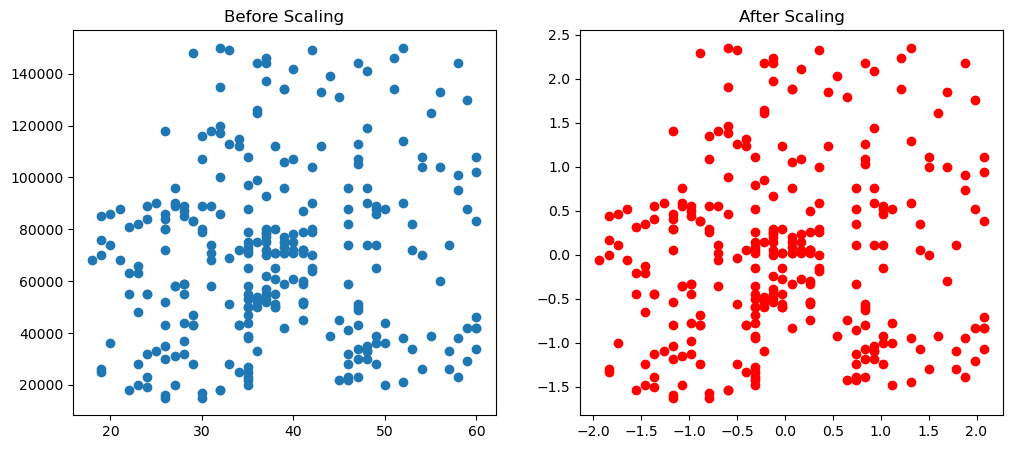

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

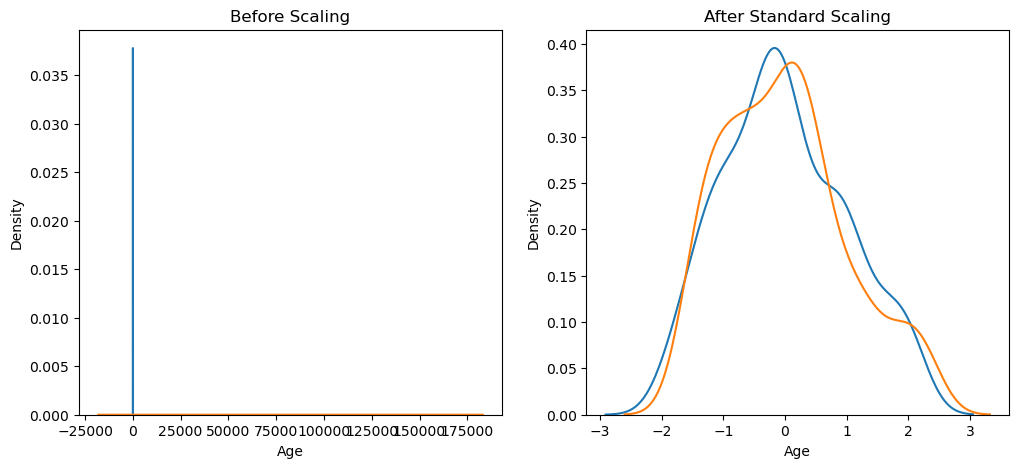

In [20]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()


Comparison of Distributions

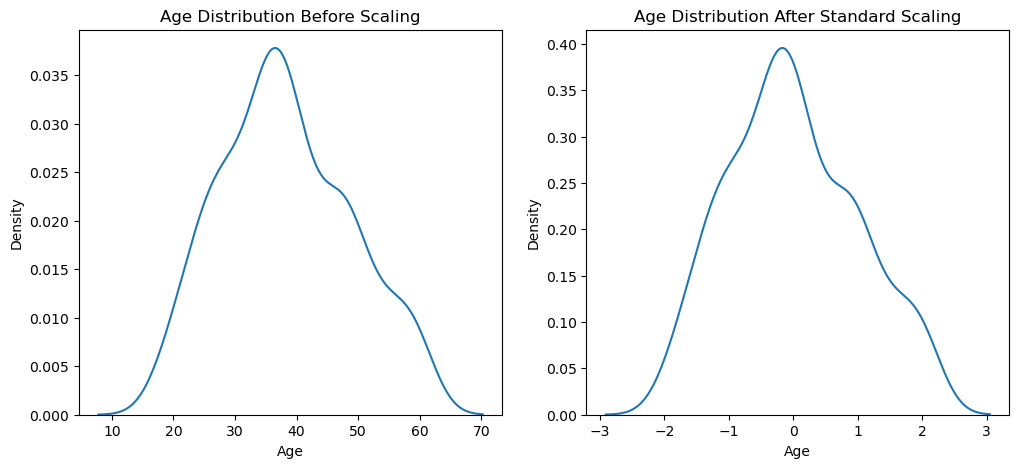

In [22]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

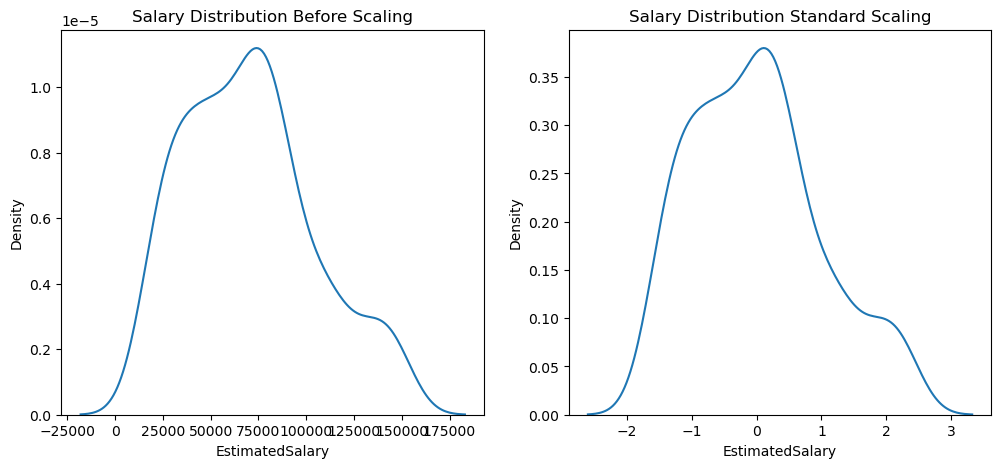

In [23]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

Why scaling is important?

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [27]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [28]:
y_pred = lr.predict(X_test)

In [29]:
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
X_train

,Age,EstimatedSalary
275,57,74000
292,55,39000
153,36,50000
189,28,32000
108,26,86000
...,...,...
129,26,84000
145,24,89000
343,47,51000
192,29,43000


In [32]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.8666666666666667
Scaled 0.8666666666666667


In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [35]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [36]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [37]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.8583333333333333
Scaled 0.85
